In [1]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="lite-model_deeplabv3_1_metadata_2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'sub_7',
  'index': 183,
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([  1, 257, 257,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [2]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'ResizeBilinear_3',
  'index': 168,
  'shape': array([  1, 257, 257,  21], dtype=int32),
  'shape_signature': array([  1, 257, 257,  21], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("image.jpg")

(612, 408)


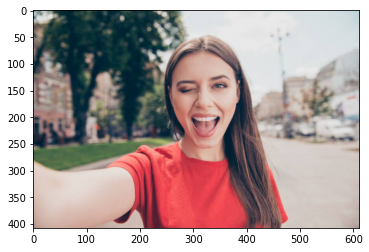

In [18]:
print(im.size)
plt.imshow(im)

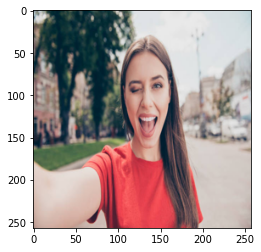

In [19]:
res_im = im.resize((257, 257))
plt.imshow(res_im)

In [6]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im/255).astype('float32')
# np_res_im

In [7]:
input_details[0]['shape']

array([  1, 257, 257,   3], dtype=int32)

In [8]:
np_res_im.shape

(257, 257, 3)

In [9]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
# output_data

In [10]:
output_data.shape

(1, 257, 257, 21)

In [11]:
output_data[0].shape

(257, 257, 21)

In [12]:
labelsArrays = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
      "car", "cat", "chair", "cow", "dining table", "dog", "horse", "motorbike",
      "person", "potted plant", "sheep", "sofa", "train", "tv"]

In [13]:
mSegmentBits = np.zeros((257,257)).astype(int)
outputbitmap = np.zeros((257,257)).astype(int)
for y in range(257):
    for x in range(257):
        maxval = 0
        mSegmentBits[x][y]=0
        
        for c in range(21):
            value = output_data[0][y][x][c]
            if c == 0 or value > maxVal:
                maxVal = value
                mSegmentBits[y][x] = c
#         print(mSegmentBits[x][y])
        label = labelsArrays[mSegmentBits[x][y]]
#         print(label)
        if(mSegmentBits[y][x]==15):
            outputbitmap[y][x]=1
        else:
            outputbitmap[y][x]=0

In [14]:
outputbitmap

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

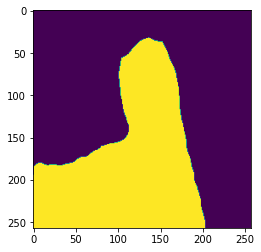

In [21]:
from PIL import Image
temp_outputbitmap= outputbitmap*255
PIL_image = Image.fromarray(np.uint8(temp_outputbitmap)).convert('L')
plt.imshow(PIL_image)

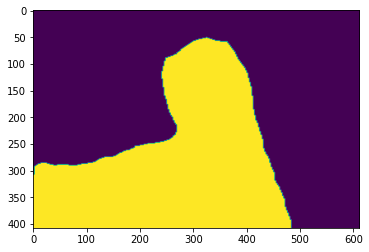

In [22]:
org_mask_img = PIL_image.resize(im.size)
plt.imshow(org_mask_img)